# Bus Pricing Behaviour Analysis

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime

%matplotlib inline

## First, some Graphs

In [142]:
data = pd.read_csv("PricingData.csv")

def comp_avg(data,key):
    avg = []
    for arr in data[key].str.split(","):
        arr_avg = 0
        if arr is np.nan:
            avg.append(0)
        else:
            for elem in arr:
                arr_avg += float(elem)
            arr_avg /= len(arr)
            avg.append(arr_avg)
    return pd.Series(avg)
        
data['SeatFareType1Avg'] = comp_avg(data,"Seat Fare Type 1")
data['SeatFareType2Avg'] = comp_avg(data,"Seat Fare Type 2")
data['SeatFareAvg'] = data['SeatFareType1Avg'] + data['SeatFareType2Avg']

data['Service Date'] = pd.to_datetime(data['Service Date'], format="%d-%m-%Y %H:%M")
data['RecordedAt'] = pd.to_datetime(data['RecordedAt'], format="%d-%m-%Y %H:%M")

data = data.drop_duplicates()

# Some buses have all their price data set to 0. Remove them from the dataset; they're neither price leaders nor followers
bus_grouping = data.groupby(['Bus'])
for bus in data['Bus'].unique():
    group = bus_grouping.get_group(bus)
    if (group['SeatFareAvg'] == 0).all():
        #print(bus)
        data = data.drop(group.index)

data.sort_values('RecordedAt').tail(20)

,Seat Fare Type 1,Seat Fare Type 2,Bus,Service Date,RecordedAt,SeatFareType1Avg,SeatFareType2Avg,SeatFareAvg
30378,NaN,530,6b60fb99e5de6ac90be3fb256c7edd33,2020-07-30,2020-07-30 08:16:00,0.00,530.0,530.00
30325,"900.00,850.00",NaN,78690969ed345320991aba0cd59e0733,2020-07-30,2020-07-30 08:16:00,875.00,0.0,875.00
29207,729,NaN,22f694bbcef788c5f2f4d44ad39fcdbd,2020-07-30,2020-07-30 08:16:00,729.00,0.0,729.00
29925,NaN,530,65890317855e746933ec8eb298f5a8ce,2020-07-30,2020-07-30 08:18:00,0.00,530.0,530.00
28926,"800.00,729.00,705.00,600.00",NaN,a6951a59b64579edcf822ab9ea4c0c83,2020-07-30,2020-07-30 08:18:00,708.50,0.0,708.50
30327,"900.00,850.00",NaN,78690969ed345320991aba0cd59e0733,2020-07-30,2020-07-30 08:19:00,875.00,0.0,875.00
29643,"600.00,550.00,500.00",NaN,bbe32cc22507520cba3b9e56765482c5,2020-07-30,2020-07-30 08:19:00,550.00,0.0,550.00
29474,NaN,"600.00,550.00",60468e0a545d3f8f7a6a19eb6cfc3ca8,2020-07-30,2020-07-30 08:20:00,0.00,575.0,575.00
29364,"850.00,800.00,750.00",NaN,28af5b39ca85472e76714235b77a08c6,2020-07-30,2020-07-30 08:20:00,800.00,0.0,800.00
28290,NaN,400,241f07f1fafbd5405c0139ae4a148a74,2020-07-30,2020-07-30 08:21:00,0.00,400.0,400.00


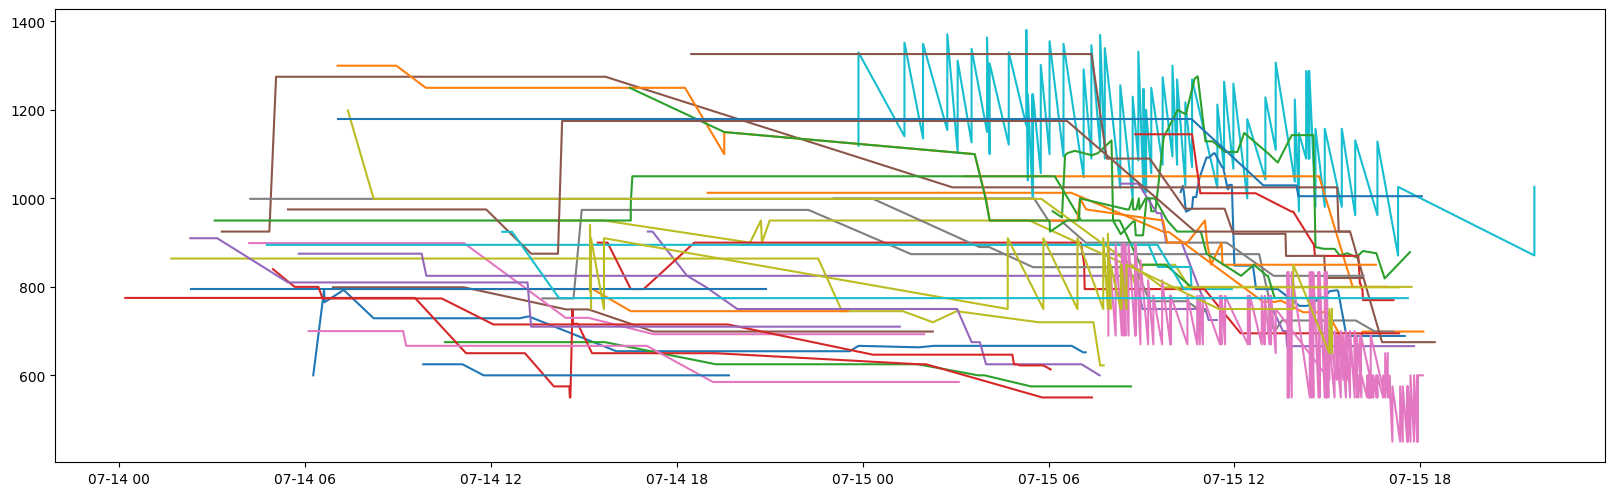

In [143]:
fares_for_15_jul = {}
data_15_jul = data.loc[data['Service Date']==datetime.datetime(2020,7,15)]
groups = data_15_jul.groupby(['Bus'])
for bus in data_15_jul['Bus'].unique():
    fares_for_15_jul[bus] = groups.get_group(bus)[['SeatFareAvg','RecordedAt']]

figure(figsize = (20, 6), dpi = 100)
for bus in fares_for_15_jul.keys():
    plt.plot(fares_for_15_jul[bus]['RecordedAt'].loc[data['RecordedAt'] > datetime.datetime(2020,7,14)], fares_for_15_jul[bus]['SeatFareAvg'].loc[data['RecordedAt'] > datetime.datetime(2020,7,14)], '-', label=bus)

#plt.legend(loc='lower right')
plt.show()

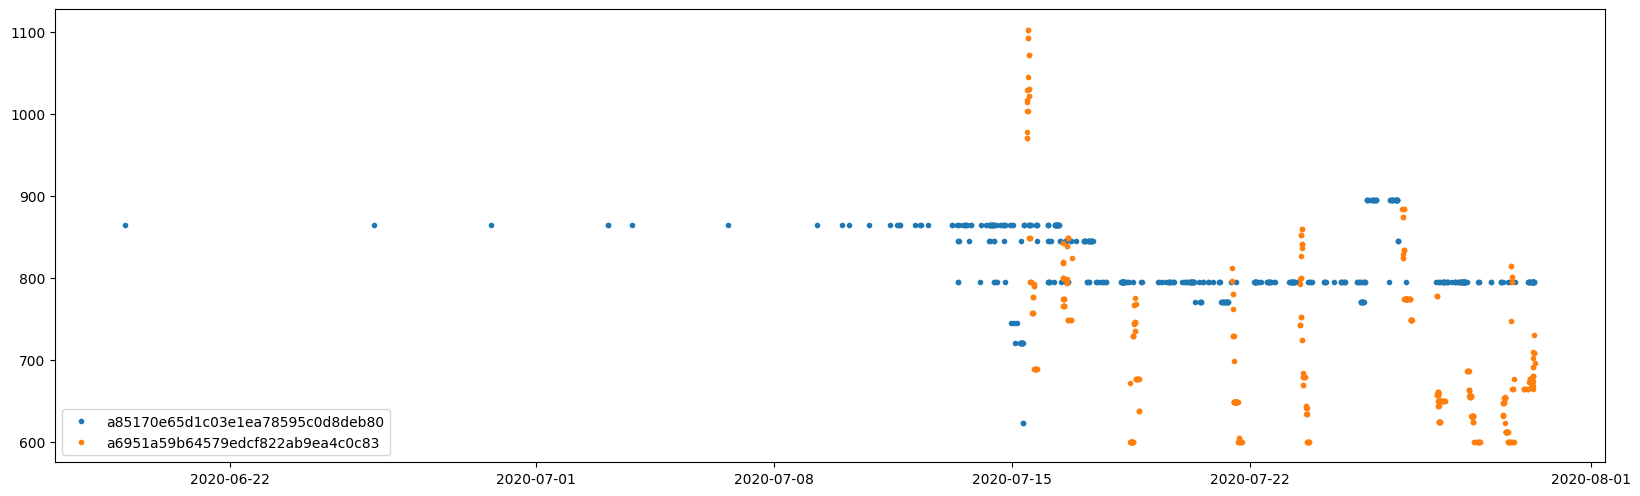

In [144]:
fares_long_term = {}
figure(figsize = (20, 6), dpi = 100)

for bus in data['Bus'].unique()[np.random.choice(data['Bus'].unique().shape[0], 2, replace=False)]:
    plt.plot(bus_grouping.get_group(bus)['RecordedAt'], bus_grouping.get_group(bus)['SeatFareAvg'], '.', label=bus)

plt.legend(loc='lower left')
plt.show()

## Now, the inference

In [145]:

random_buses = data['Bus'].unique()[np.random.choice(data['Bus'].unique().shape[0], 2, replace=False)]
print(random_buses)
bus1 = bus_grouping.get_group(random_buses[0])
bus2 = bus_grouping.get_group(random_buses[1])

sorted_bus1 = bus1.sort_values('RecordedAt')
sorted_bus2 = bus2.sort_values('RecordedAt')

start_max = max(sorted_bus1.iloc[0]['RecordedAt'], sorted_bus2.iloc[0]['RecordedAt'])
stop_min = min(sorted_bus1.iloc[-1]['RecordedAt'], sorted_bus2.iloc[-1]['RecordedAt'])

print(start_max)
print(stop_min)

delta = stop_min - start_max
size = delta.seconds//60 + delta.days*24*60
print(size)

bus1_ts = []
bus2_ts = []

for i in range(size):
    sb1search = sorted_bus1.loc[sorted_bus1['RecordedAt'] == start_max + datetime.timedelta(minutes=i)]
    sb2search = sorted_bus2.loc[sorted_bus2['RecordedAt'] == start_max + datetime.timedelta(minutes=i)]
    setsame_b1 = setsame_b2 = False
    if not sb1search.empty:
        bus1_ts.append(sb1search.iloc[0]['SeatFareAvg'])
    elif not bus1_ts:
        ltsb1search = sorted_bus1.loc[sorted_bus1['RecordedAt'] < start_max + datetime.timedelta(minutes=i)]
        if ltsb1search.empty:
            setsame_b1 = True
        else:
            bus1_ts.append(ltsb1search.iloc[-1]['SeatFareAvg'])
    else:
        bus1_ts.append(bus1_ts[-1])
        
    if not sb2search.empty:
        bus2_ts.append(sb2search.iloc[0]['SeatFareAvg'])
    elif not bus2_ts:
        ltsb2search = sorted_bus2.loc[sorted_bus2['RecordedAt'] < start_max + datetime.timedelta(minutes=i)]
        if ltsb2search.empty:
            setsame_b2 = True
        else:
            bus2_ts.append(ltsb2search.iloc[-1]['SeatFareAvg'])
    else:
        bus2_ts.append(bus2_ts[-1])
    
    if setsame_b1:
        bus1_ts[0] = bus2_ts[-1]
    elif setsame_b2:
        bus2_ts[0] = bus1_ts[-1]

bus1_ts = np.asarray(bus1_ts)
bus2_ts = np.asarray(bus2_ts)

print(np.std(bus1_ts))
print(np.std(bus2_ts))
        
bus1_ts = (bus1_ts - np.mean(bus1_ts)) / (np.std(bus1_ts)*len(bus1_ts))
bus2_ts = (bus2_ts - np.mean(bus2_ts)) / (np.std(bus2_ts))
        
cc12 = np.correlate(bus1_ts, bus2_ts)
cc21 = np.correlate(bus2_ts, bus1_ts)
confidence = max(cc12, cc21)

if max(cc12) > max(cc21):
    # bus1 follows
    print(f"Bus1 follows: confidence {confidence}")
else:
    # bus2 follows
    print(f"Bus1 leads: confidence {confidence}")

# 86400 minutes at max, starting from 

#for bus in data['Bus'].unique()[np.random.choice(data['Bus'].unique().shape[0], 2, replace=False)]:
#    plt.plot(bus_grouping.get_group(bus)['RecordedAt'], bus_grouping.get_group(bus)['SeatFareAvg'], '.', label=bus)

['23c7bd7bcab9a19b7da7cae4e3d4659a' 'c6cc315d21e0815a9bf68a26308e91ab']
2020-07-01 12:04:00
2020-07-30 06:47:00
41443
27.12015114251462
77.09865677278565
Bus1 leads: confidence [-0.32174914]
